In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
pip install plotly


In [143]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.offline import iplot

In [144]:
df = pd.read_csv('mostupdated.csv')


# Data Cleaning

In [146]:
df.head(5)

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-I,NA-1,Muhammad Yousaf Khattak,PAKISTAN MUSLIM LEAGUE (QA),44507,79847,2688,82535,82535,0.550,1977
1,PESHAWAR,PESHAWAR-I,NA-1,Air Marshal (Retd) Asghar Khan,PNA,33964,79847,2688,82535,82535,0.550,1977
2,PESHAWAR,PESHAWAR-I,NA-1,Jan Akbar,IND,1376,79847,2688,82535,82535,0.550,1977
3,PESHAWAR,PESHAWAR-II,NA-2,Arbab Mohammad Jehandir Khan,PPPP,32247,65825,2155,67980,67980,0.524,1977
4,PESHAWAR,PESHAWAR-II,NA-2,Arbab Saif-ur-Rahman,PNA,30268,65825,2155,67980,67980,0.524,1977


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18607 entries, 0 to 18606
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District                 18607 non-null  object 
 1   Seat                     18607 non-null  object 
 2   Constituency_title       18607 non-null  object 
 3   Candidate_Name           18607 non-null  object 
 4   Party                    18607 non-null  object 
 5   Votes                    18607 non-null  object 
 6   Total_Valid_Votes        18607 non-null  object 
 7   Total_Rejected_Votes     18607 non-null  object 
 8   Total_Votes              18607 non-null  object 
 9   Total_Registered_Voters  18607 non-null  object 
 10  Turnout                  18607 non-null  float64
 11  Election                 18607 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.7+ MB


In [148]:
df.isnull().sum()


District                   0
Seat                       0
Constituency_title         0
Candidate_Name             0
Party                      0
Votes                      0
Total_Valid_Votes          0
Total_Rejected_Votes       0
Total_Votes                0
Total_Registered_Voters    0
Turnout                    0
Election                   0
dtype: int64

# Cleaned Spaces from Columns and replaced with 0

In [149]:
df.loc[:, 'Votes'] = df.loc[:, 'Votes'].replace (r' ', 0, regex=True)
df.loc[:, 'Total_Valid_Votes'] = df.loc[:, 'Total_Valid_Votes'].replace (r' ', 0, regex=True)
df.loc[:, 'Total_Rejected_Votes'] = df.loc[:, 'Total_Rejected_Votes'].replace (r' ', 0, regex=True)
df.loc[:, 'Total_Votes'] = df.loc[:, 'Total_Votes'].replace (r' ', 0, regex=True)
df.loc[:, 'Total_Registered_Voters'] = df.loc[:, 'Total_Registered_Voters'].replace (r' ', 0, regex=True)
df.loc[:, 'Turnout'] = df.loc[:, 'Turnout'].replace (r' ', 0, regex=True)



In [10]:
df1 = df['Votes'].replace(" ", 0)


In [11]:
df2 = df['Total_Valid_Votes'].replace(" ", 0)

In [12]:
df3 = df['Total_Rejected_Votes'].replace(" ", 0)

In [13]:
df4 = df['Total_Votes'].replace(" ", 0)

In [14]:
df5 = df['Total_Registered_Voters'].replace(" ", 0)

In [15]:
df6 = df['Turnout'].replace(" ", 0)

In [16]:
df1

0        44507
1        33964
2         1376
3        32247
4        30268
         ...  
18602      882
18603    41866
18604      162
18605      338
18606     4604
Name: Votes, Length: 18607, dtype: object

# The manipulated dataframe has object datatype and we are unable to perform common function on object type column, therefore we change the column type from object to int

In [17]:
df1.sum()

TypeError: can only concatenate str (not "int") to str

In [18]:
a = pd.DataFrame(df1)
a1 = a['Votes'].astype('int')
Votes = pd.DataFrame(a1)
#Votes.info()
Votes.sum()

Votes    254920540
dtype: int64

In [19]:
b = pd.DataFrame(df2)
b1 = b['Total_Valid_Votes'].astype('int')
Total_Valid_Votes = pd.DataFrame(b1)
#Total_Valid_Votes.info()
Total_Valid_Votes.sum()

Total_Valid_Votes    1820894785
dtype: int64

In [20]:
c = pd.DataFrame(df3)
c1 = c['Total_Rejected_Votes'].astype('int')
Total_Rejected_Votes = pd.DataFrame(c1)
#Total_Rejected_Votes.info()
Total_Rejected_Votes.sum()

Total_Rejected_Votes    47342800
dtype: int64

In [21]:
d = pd.DataFrame(df4)
d1 = d['Total_Votes'].astype('int')
Total_Votes = pd.DataFrame(d1)
#Total_Votes.info()
Total_Votes.sum()

Total_Votes    1875849753
dtype: int64

In [22]:
e = pd.DataFrame(df5)
e1 = e['Total_Registered_Voters'].astype('int')
Total_Registered_Voters = pd.DataFrame(e1)
#Total_Registered_Voters.info()
Total_Registered_Voters.sum()

Total_Registered_Voters    1875849753
dtype: int64

In [23]:
f = pd.DataFrame(df6)
f1 = f['Turnout'].astype('float')
Turnout = pd.DataFrame(f1)
#Turnout.info()
Turnout.sum()

Turnout    317568.86849
dtype: float64

In [24]:
data = pd.concat([Votes,Total_Valid_Votes,Total_Rejected_Votes, Total_Votes,
                  Total_Registered_Voters,Turnout],ignore_index=True)

data.shape

(111642, 6)

In [25]:
data

,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout
0,44507.0,NaN,NaN,NaN,NaN,NaN
1,33964.0,NaN,NaN,NaN,NaN,NaN
2,1376.0,NaN,NaN,NaN,NaN,NaN
3,32247.0,NaN,NaN,NaN,NaN,NaN
4,30268.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
111637,NaN,NaN,NaN,NaN,NaN,0.56
111638,NaN,NaN,NaN,NaN,NaN,0.56
111639,NaN,NaN,NaN,NaN,NaN,0.56
111640,NaN,NaN,NaN,NaN,NaN,0.56


# Download Clean Dataset

In [27]:
df.to_csv(r'D:\MS-material\Stats and Prob\PROJECT\data.csv', index=False)

# Reimport Dataset

In [28]:

df0 = pd.read_csv('data.csv')


# Cleaning Trunout Column

In [29]:
df0['Turnout'] = np.where(df0['Turnout'] < 1, (df0['Turnout'])*100 , df0['Turnout'])
df0.tail()

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
18602,LASBELA,LASBELA-CUM-GWADAR,NA-272,Mohammad Akram,PAK SARZAMEEN PARTY,882,0,0,0,0,56.0,2018
18603,LASBELA,LASBELA-CUM-GWADAR,NA-272,Muhammad Akhtar mengal,BALOCHISTAN NATIONAL PARTY,41866,0,0,0,0,56.0,2018
18604,LASBELA,LASBELA-CUM-GWADAR,NA-272,Nawab Khan Bizenjo,AMUN TARAQQI PARTY,162,0,0,0,0,56.0,2018
18605,LASBELA,LASBELA-CUM-GWADAR,NA-272,Shakeel Ahmed,IND,338,0,0,0,0,56.0,2018
18606,LASBELA,LASBELA-CUM-GWADAR,NA-272,Wazeer Ahmed Norani,TEHREEK-E-LABBAIK PAKISTAN,4604,0,0,0,0,56.0,2018


In [30]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18607 entries, 0 to 18606
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District                 18607 non-null  object 
 1   Seat                     18607 non-null  object 
 2   Constituency_title       18607 non-null  object 
 3   Candidate_Name           18607 non-null  object 
 4   Party                    18607 non-null  object 
 5   Votes                    18607 non-null  int64  
 6   Total_Valid_Votes        18607 non-null  int64  
 7   Total_Rejected_Votes     18607 non-null  int64  
 8   Total_Votes              18607 non-null  int64  
 9   Total_Registered_Voters  18607 non-null  int64  
 10  Turnout                  18607 non-null  float64
 11  Election                 18607 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.7+ MB


In [31]:
df0.shape

(18607, 12)

# Split the data with respect to each election year

In [32]:
df_2018 = df0.loc[df0['Election'] == 2018]
df_2013 = df0.loc[df0['Election'] == 2013]
df_2008 = df0.loc[df0['Election'] == 2008]
df_2002 = df0.loc[df0['Election'] == 2002]
df_1997 = df0.loc[df0['Election'] == 1997]
df_1993 = df0.loc[df0['Election'] == 1993]
df_1990 = df0.loc[df0['Election'] == 1990]
df_1988 = df0.loc[df0['Election'] == 1988]
df_1977 = df0.loc[df0['Election'] == 1977]

# Q1: Highest Number of Votes in each election year 

In [33]:
x=df0['Election'].unique()
y = df0.groupby('Election').Votes.sum()


print(x)
print(y)

[1977 1988 1990 1993 1997 2002 2008 2013 2018]
Election
1977    16821875
1988    19793947
1990    20937412
1993    20572536
1997    20113948
2002    24329464
2008    33624852
2013    45865220
2018    52861286
Name: Votes, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



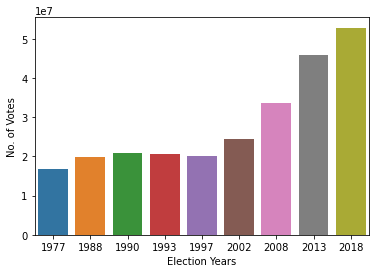

In [34]:

fig = sns.barplot(x, y,data = df0)
fig.set(xlabel= 'Election Years', ylabel= 'No. of Votes')
plt.show()

# Q2: Total Number of votes by each Constituency in 2018

In [114]:

x=df_2018['Constituency_title'].unique()
data = [go.Bar(
    x=x,
    y=df_2018.groupby(['Constituency_title'])['Votes'].sum().nlargest(10),
    textposition = 'auto',
    marker=dict(
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
    )]
layout = {
  'xaxis': {'title': 'Constituency_title'},
  'yaxis': {'title': 'Votes'},
  'barmode': 'relative',
  'title': 'Number of Candidates Appearing in 2018 Elections'
};
iplot({'data': data, 'layout': layout})


In [113]:
constituency = df_2018['Constituency_title'].unique()
party = df_2018['Party'].unique()
seats = df_2018['Seat'].unique()

const = pd.DataFrame(constituency)
part =  pd.DataFrame( party)
seat =  pd.DataFrame( seats)
res = pd.concat([part, const, seat], axis=1)
res.columns = ['Party', 'Constituency_title', 'Seat']
res.head(10)



,Party,Constituency_title,Seat
0,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,NA-1,CHITRAL
1,PAKISTAN RAH-E-HAQ PARTY,NA-2,SWAT-I
2,IND,NA-3,SWAT-II
3,AWAMI NATIONAL PARTY,NA-4,SWAT-ILL
4,ALL PAKISTAN MUSLIM LEAGUE,NA-5,UPPER
5,PTI,NA-6,LOWER
6,PAKISTAN MUSLIM LEAGUE (N),NA-7,MALAKAND
7,PPPP,NA-8,BUNER
8,PASHTOONKHWA MILLI AWAMI PARTY,NA-9,SHANGLA
9,JUI (NAZRYATI),NA-10,KOHISTAN-CUM-LOWER


# Total Number of votes by each Constituency in 2013

In [115]:

x=df_2013['Constituency_title'].unique()
data = [go.Bar(
    x=x,
    y=df_2013.groupby(['Constituency_title'])['Votes'].sum().nlargest(10),
    textposition = 'auto',
    marker=dict(
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
    )]
layout = {
  'xaxis': {'title': 'Constituency_title'},
  'yaxis': {'title': 'Votes'},
  'barmode': 'relative',
  'title': 'Number of Candidates Appearing in 2013 Elections'
};
iplot({'data': data, 'layout': layout})


In [116]:
constituency = df_2013['Constituency_title'].unique()
party = df_2013['Party'].unique()
seats = df_2013['Seat'].unique()

const = pd.DataFrame(constituency)
part =  pd.DataFrame( party)
seat =  pd.DataFrame( seats)
res = pd.concat([part, const, seat], axis=1)
res.columns = ['Party', 'Constituency_title', 'Seat']
res.head(10)



,Party,Constituency_title,Seat
0,MUSTAQBIL PAKISTAN,NA-1,PESHAWAR-I
1,IND,NA-2,PESHAWAR-II
2,AWAMI NATIONAL PARTY,NA-3,PESHAWAR-III
3,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),NA-4,PESHAWAR-IV
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,NA-5,NOWSHERA-I
5,JAMIAT ULAMA-E-ISLAM (F),NA-6,NOWSHERA-II
6,MUTAHIDA DEENI MAHAZ,NA-7,CHARSADDA-I
7,PTI,NA-8,CHARSADDA-II
8,QAUMI WATAN PARTY (SHERPAO),NA-9,MARDAN-I
9,PAKISTAN MUSLIM LEAGUE (J),NA-10,MARDAN-II


# Total Number of votes by each Constituency in 2007

In [117]:

x=df_2008['Constituency_title'].unique()
data = [go.Bar(
    x=x,
    y=df_2008.groupby(['Constituency_title'])['Votes'].sum().nlargest(10),
    textposition = 'auto',
    marker=dict(
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
    )]
layout = {
  'xaxis': {'title': 'Constituency_title'},
  'yaxis': {'title': 'Votes'},
  'barmode': 'relative',
  'title': 'Number of Candidates Appearing in 2008 Elections'
};
iplot({'data': data, 'layout': layout})


In [118]:
constituency = df_2008['Constituency_title'].unique()
party = df_2008['Party'].unique()
seats = df_2008['Seat'].unique()

const = pd.DataFrame(constituency)
part =  pd.DataFrame( party)
seat =  pd.DataFrame( seats)
res = pd.concat([part, const, seat], axis=1)
res.columns = ['Party', 'Constituency_title', 'Seat']
res.head(15)



,Party,Constituency_title,Seat
0,IND,NA-1,PESHAWAR-1
1,PPPP,NA-2,PESHAWAR-II
2,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,NA-3,PESHAWAR-III
3,AWAMI NATIONAL PARTY,NA-4,PESHAWAR-IV
4,AWAMI HIMAYAT TEHREEK PAKISTAN,NA-5,NOWSHERA-I
5,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),NA-6,NOWSHERA-II
6,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,NA-7,CHARSADDA-I
7,PAKISTAN MUSLIM LEAGUE,NA-9,MARDAN-I
8,PAKISTAN MUSLIM LEAGUE (N),NA-10,MARDAN-II
9,JAMIAT ULAMA-E-ISLAM PAKISTAN (S),NA-11,MARDAN-III


# Total Number of votes by each Constituency in 2002

In [119]:

x=df_2002['Constituency_title'].unique()
data = [go.Bar(
    x=x,
    y=df_2002.groupby(['Constituency_title'])['Votes'].sum().nlargest(10),
    textposition = 'auto',
    marker=dict(
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
    )]
layout = {
  'xaxis': {'title': 'Constituency_title'},
  'yaxis': {'title': 'Votes'},
  'barmode': 'relative',
  'title': 'Number of Candidates Appearing in 2002 Elections'
};
iplot({'data': data, 'layout': layout})


In [120]:
constituency = df_2002['Constituency_title'].unique()
party = df_2002['Party'].unique()
seats = df_2002['Seat'].unique()

const = pd.DataFrame(constituency)
part =  pd.DataFrame( party)
seat =  pd.DataFrame( seats)
res = pd.concat([part, const, seat], axis=1)
res.columns = ['Party', 'Constituency_title', 'Seat']
res.head(15)



,Party,Constituency_title,Seat
0,PTI,NA-1,PESHAWAR-I
1,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,NA-2,PESHAWAR-II
2,AWAMI NATIONAL PARTY,NA-3,PESHAWAR-III
3,IND,NA-4,PESHAWAR-IV
4,PAKISTAN MUSLIM LEAGUE (QA),NA-5,NOWSHERA-I
5,PAK WATTAN PARTY,NA-6,NOWSHERA-II
6,PPPP,NA-7,CHARSADDA-I
7,PAKISTAN PEOPLES PARTY(SHERPAO),NA-8,CHARSDDA-II
8,NATIONAL ALLIANCE,NA-9,MARDAN-I
9,PAKISTAN MUSLIM LEAGUE (N),NA-10,MARDAN-II


# Q3: Which year had the highest number of registered voters?

In [121]:
x=df0['Election'].unique()
y = df0.groupby('Election').Total_Registered_Voters.sum()


print(x)
print(y)


[1977 1988 1990 1993 1997 2002 2008 2013 2018]
Election
1977     51385710
1988    123765957
1990    129727277
1993    128932199
1997    163534613
2002    182239146
2008    277588853
2013    764413990
2018     54262008
Name: Total_Registered_Voters, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



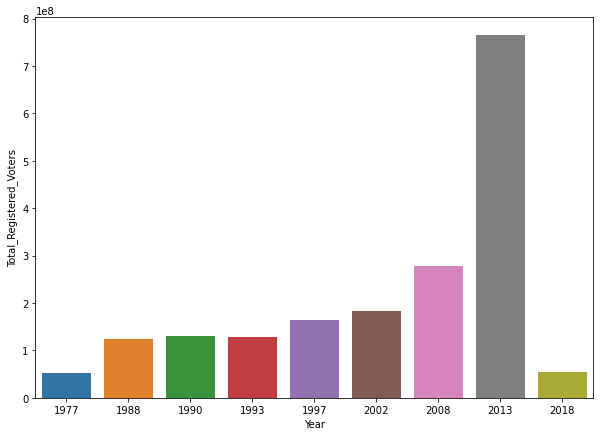

In [122]:
fig = sns.barplot(x, y,data = df0)
fig.set(xlabel= 'Year', ylabel= 'Total_Registered_Voters')
plt.show()

# Q4: What is the ratio of the total valid votes to rejected votes of the dataset?

In [123]:
x_2018 = df_2018.Total_Valid_Votes.sum()
y_2018 =  df_2018.Total_Rejected_Votes.sum()
#print(y,z)

ratio_2018 = ((y_2018/x_2018)*100)
v_2018 = ratio_2018.astype('float')
print("Ratio of rejected votes to Total votes in 2018",v_2018)




x_2013 = df_2013.Total_Valid_Votes.sum()
y_2013 =  df_2013.Total_Rejected_Votes.sum()

ratio_2013 = ((y_2013/x_2013)*100)
v_2013 = ratio_2013.astype('float')
print("Ratio of rejected votes to Total votes in 2013= ",v_2013)




x_2008 = df_2008.Total_Valid_Votes.sum()
y_2008 =  df_2008.Total_Rejected_Votes.sum()
#print(y,z)

ratio_2008 = ((y_2008/x_2008)*100)
v_2008 = ratio_2008.astype('float')
print("Ratio of rejected votes to Total votes in 2008= ",v_2008)



x_2002 = df_2002.Total_Valid_Votes.sum()
y_2002 =  df_2002.Total_Rejected_Votes.sum()
#print(y,z)

ratio_2002 = ((y_2002/x_2002)*100)
v_2002 = ratio_2002.astype('float')
print("Ratio of rejected votes to Total votes in 2002= ",v_2002)





x_1997 = df_1997.Total_Valid_Votes.sum()
y_1997 =  df_1997.Total_Rejected_Votes.sum()
#print(y,z)

ratio_1997 = ((y_1997/x_1997)*100)
v_1997 = ratio_1997.astype('float')
print("Ratio of rejected votes to Total votes in 1997= ",v_1997)




x_1993 = df_1993.Total_Valid_Votes.sum()
y_1993 =  df_1993.Total_Rejected_Votes.sum()
#print(y,z)

ratio_1993 = ((y_1993/x_1993)*100)
v_1993 = ratio_1993.astype('float')
print("Ratio of rejected votes to Total votes in 1993= ",v_1993)




x_1990 = df_1990.Total_Valid_Votes.sum()
y_1990 =  df_1990.Total_Rejected_Votes.sum()


ratio_1990 = ((y_1990/x_1990)*100)
v_1990 = ratio_1990.astype('float')
print("Ratio of rejected votes to Total votes in 1990= ",v_1990)



x_1988 = df_1988.Total_Valid_Votes.sum()
y_1988=  df_1988.Total_Rejected_Votes.sum()


ratio_1988 = ((y_1988/x_1988)*100)
v_1988 = ratio_1988.astype('float')
print("Ratio of rejected votes to Total votes in 1988= ",v_1988)




x_1977 = df_1977.Total_Valid_Votes.sum()
y_1977=  df_1977.Total_Rejected_Votes.sum()


ratio_1977 = ((y_1977/x_1977)*100)
v_1977 = ratio_1977.astype('float')
print("Ratio of rejected votes to Total votes in 1977= ",v_1977)

Ratio of rejected votes to Total votes in 2018 3.160761497503903
Ratio of rejected votes to Total votes in 2013=  3.263704160817755
Ratio of rejected votes to Total votes in 2008=  2.5241941710492033
Ratio of rejected votes to Total votes in 2002=  2.5484258568424245
Ratio of rejected votes to Total votes in 1997=  2.147457115833952
Ratio of rejected votes to Total votes in 1993=  1.3583568074460914
Ratio of rejected votes to Total votes in 1990=  1.0598473658131473
Ratio of rejected votes to Total votes in 1988=  1.623987927736478
Ratio of rejected votes to Total votes in 1977=  3.528536611665503


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



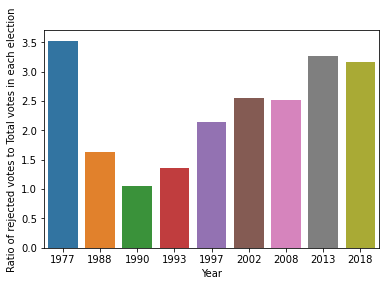

In [46]:
elec = df0['Election'].unique()
lst = [v_1977, v_1988, v_1990, v_1993, v_1997, v_2002, v_2008, v_2013, v_2018]
fig = sns.barplot(elec, lst,data = df0)
fig.set(xlabel= 'Year', ylabel= 'Ratio of rejected votes to Total votes in each election')
plt.show()

# Q5: What is the ratio of appeared voters and accepted votes?

In [54]:
x_2018 = df_2018.Total_Registered_Voters.sum()
y_2018 =  df_2018.Total_Valid_Votes.sum()
#print(y,z)

ratio_2018 = ((y_2018/x_2018)*100)
v_2018 = ratio_2018.astype('float')
print("Ratio of Registered votes to Acceped votes in 2018 = ",v_2018)




x_2013 = df_2013.Total_Registered_Voters.sum()
y_2013 =  df_2013.Total_Valid_Votes.sum()

ratio_2013 = ((y_2013/x_2013)*100)
v_2013 = ratio_2013.astype('float')
print("Ratio of Registered votes to Acceped votes in 2013 ",v_2013)




x_2008 = df_2008.Total_Registered_Voters.sum()
y_2008 =  df_2008.Total_Valid_Votes.sum()
#print(y,z)

ratio_2008 = ((y_2008/x_2008)*100)
v_2008 = ratio_2008.astype('float')
print("Ratio of Registered votes to Acceped votes in 2008 = ",v_2008)



x_2002 = df_2002.Total_Registered_Voters.sum()
y_2002 =  df_2002.Total_Valid_Votes.sum()
#print(y,z)

ratio_2002 = ((y_2002/x_2002)*100)
v_2002 = ratio_2002.astype('float')
print("Ratio of Registered votes to Acceped votes in 2002=  ",v_2002)





x_1997 = df_1997.Total_Registered_Voters.sum()
y_1997 =  df_1997.Total_Valid_Votes.sum()
#print(y,z)

ratio_1997 = ((y_1997/x_1997)*100)
v_1997 = ratio_1997.astype('float')
print("Ratio of Registered votes to Acceped votes in 1997= ",v_1997)




x_1993 = df_1993.Total_Registered_Voters.sum()
y_1993 =  df_1993.Total_Valid_Votes.sum()
#print(y,z)

ratio_1993 = ((y_1993/x_1993)*100)
v_1993 = ratio_1993.astype('float')
print("Ratio of Registered votes to Acceped votes in 1993= ",v_1993)




x_1990 = df_1990.Total_Registered_Voters.sum()
y_1990 =  df_1990.Total_Valid_Votes.sum()


ratio_1990 = ((y_1990/x_1990)*100)
v_1990 = ratio_1990.astype('float')
print("Ratio of Registered votes to Acceped votes in 1990= ",v_1990)



x_1988 = df_1988.Total_Registered_Voters.sum()
y_1988=  df_1988.Total_Valid_Votes.sum()


ratio_1988 = ((y_1988/x_1988)*100)
v_1988 = ratio_1988.astype('float')
print("Ratio of Registered votes to Acceped votes in 1988= ",v_1988)




x_1977 = df_1977.Total_Registered_Voters.sum()
y_1977=  df_1977.Total_Valid_Votes.sum()


ratio_1977 = ((y_1977/x_1977)*100)
v_1977 = ratio_1977.astype('float')
print("Ratio of Registered votes to Acceped votes in 1977=" ,v_1977)

Ratio of Registered votes to Acceped votes in 2018 =  97.07644619417697
Ratio of Registered votes to Acceped votes in 2013  97.03238764638517
Ratio of Registered votes to Acceped votes in 2008 =  96.91749257669218
Ratio of Registered votes to Acceped votes in 2002=   97.51490494802911
Ratio of Registered votes to Acceped votes in 1997=  98.22726091631745
Ratio of Registered votes to Acceped votes in 1993=  95.40726440258729
Ratio of Registered votes to Acceped votes in 1990=  98.95126835969894
Ratio of Registered votes to Acceped votes in 1988=  95.42215150487625
Ratio of Registered votes to Acceped votes in 1977= 96.59172559842027


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



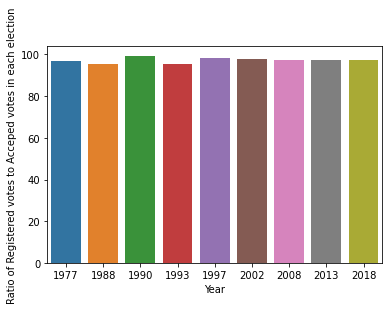

In [55]:
elec = df0['Election'].unique()
lst = [v_1977, v_1988, v_1990, v_1993, v_1997, v_2002, v_2008, v_2013, v_2018]
fig = sns.barplot(elec, lst,data = df0)
fig.set(xlabel= 'Year', ylabel= 'Ratio of Registered votes to Acceped votes in each election')
plt.show()

# Q6: Calculate average turn out of every single election using groupby.

In [56]:
df_turnout_year = df0.groupby("Election")['Turnout']

In [57]:
df_turnout_year.mean()


Election
1977    56.323401
1988    45.119139
1990    45.916615
1993    40.906799
1997    35.726602
2002    39.082860
2008    42.450604
2013    53.895108
2018    48.916599
Name: Turnout, dtype: float64

# Year wise plot average turnout of election via line chart (years on x-axis and average turn out on the y-axis)

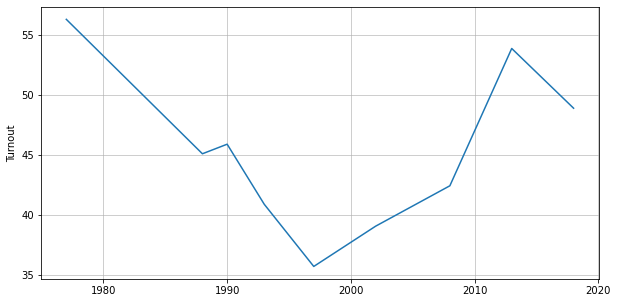

In [58]:
plt.figure(figsize=(10,5))
plt.plot(df_turnout_year.mean())
plt.ylabel('Turnout')
plt.grid(axis='y', alpha=0.77)
plt.grid(axis='x', alpha=0.77)
plt.show()

# Elections overall results depends on the turnout of votes, with the time, we can see from Turn over the number of Votes increasded as it is directly propotional to population growth, but since it shows the improvement that valid vote counts also incread while decreasing of reject votes. From the above diagram we can see that the average Turn of single election including all the province and NAs decreases from 1970 till 1997 but after that it changed it's behaviour and started to increase ( keep in mind that with the same election system the valid count also increased which triggers the alarms...), The graph behaviour predicts that in next election Average Turnout will also decreased to the Total average line but after that in the next elections it will increase

# Q8: Get list of candidates per NA seat

In [91]:
list_of_candidates_per_na_2013 = df_2013.groupby('Constituency_title').size().reset_index(name='candidates')

sorted_idx = (list_of_candidates_per_na_2013.assign(Constituency_title=list_of_candidates_per_na_2013.Constituency_title.str.extract(r'(\d+)$').astype(int))
         .sort_values(['Constituency_title'])
         .index)
list_of_candidates_per_na_2013 = list_of_candidates_per_na_2013.iloc[sorted_idx]

x = list_of_candidates_per_na_2013.Constituency_title
y = list_of_candidates_per_na_2013.candidates

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

In [154]:
constituency = df_2013['Constituency_title'].unique()
party = df_2013['Party'].unique()


const = pd.DataFrame(constituency)
part =  pd.DataFrame( party)
res = pd.concat([part, const], axis=1)
res.columns = ['Party', 'Constituency_title']
res.head(4)



,Party,Constituency_title
0,MUSTAQBIL PAKISTAN,NA-1
1,IND,NA-2
2,AWAMI NATIONAL PARTY,NA-3
3,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),NA-4


# Q9: List of candidates per party

In [92]:
list_of_candidates_per_party_2013 = df_2013.groupby(['Party']).size().reset_index(name='candidates').sort_values('candidates', ascending=False)

fig = px.funnel(list_of_candidates_per_party_2013, x='Party', y='candidates', height=700)
fig.show()

# Q10: Top 5 Parties who winned with max votes in previous election years

In [93]:
Parties_gain_2018 = df_2018.groupby('Party').Votes.sum().sort_values(ascending=False).head(5)
Parties_gain_2013 = df_2013.groupby('Party').Votes.sum().sort_values(ascending=False).head(5)
Parties_gain_2008 = df_2008.groupby('Party').Votes.sum().sort_values(ascending=False).head(5)
Parties_gain_2002 = df_2002.groupby('Party').Votes.sum().sort_values(ascending=False).head(5)



Text(0.5, 1.0, 'Top 5 Parties 2018')

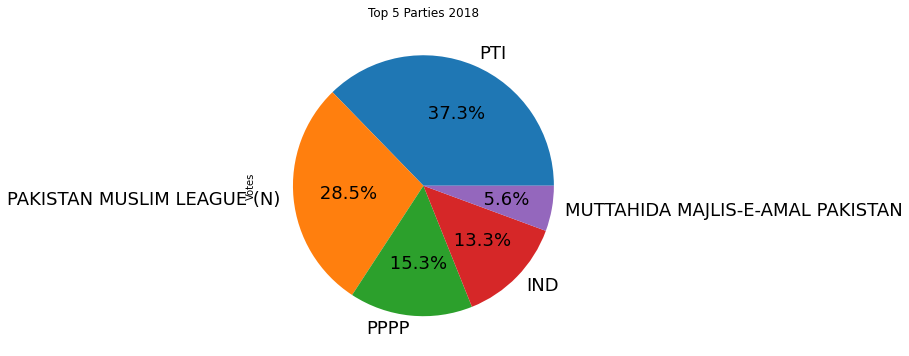

In [94]:
Parties_gain_2018.plot.pie(subplots=True, figsize=(20,6),autopct='%5.1f%%',textprops={'fontsize': 18})
plt.title('Top 5 Parties 2018')

Text(0.5, 1.0, 'Top 5 Parties 2013')

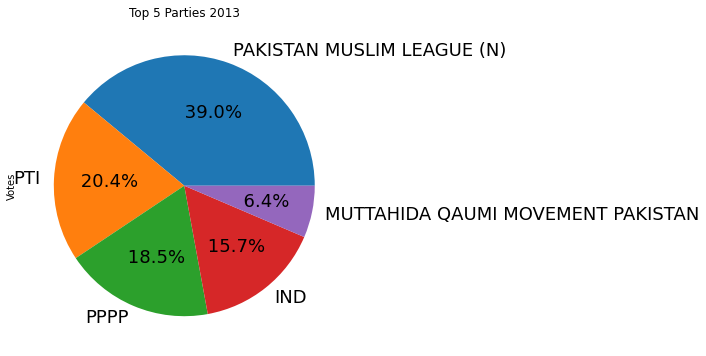

In [95]:
Parties_gain_2013.plot.pie(subplots=True, figsize=(20,6),autopct='%5.1f%%',textprops={'fontsize': 18})
plt.title('Top 5 Parties 2013')

Text(0.5, 1.0, 'Top 5 Parties 2007')

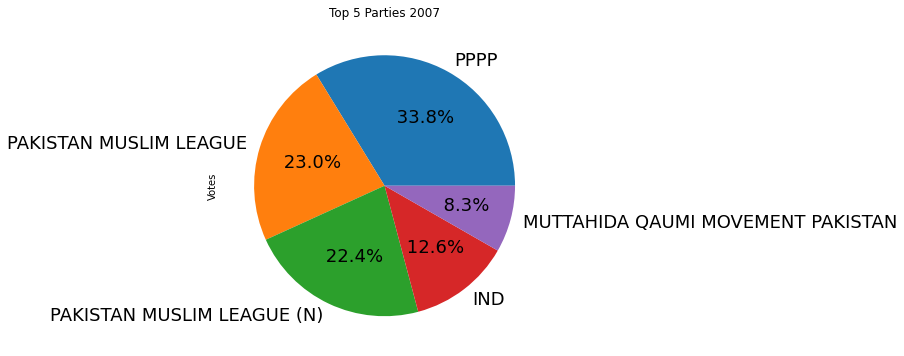

In [96]:
Parties_gain_2008.plot.pie(subplots=True, figsize=(20,6),autopct='%5.1f%%',textprops={'fontsize': 18})
plt.title('Top 5 Parties 2007')

Text(0.5, 1.0, 'Top 5 Parties 2002')

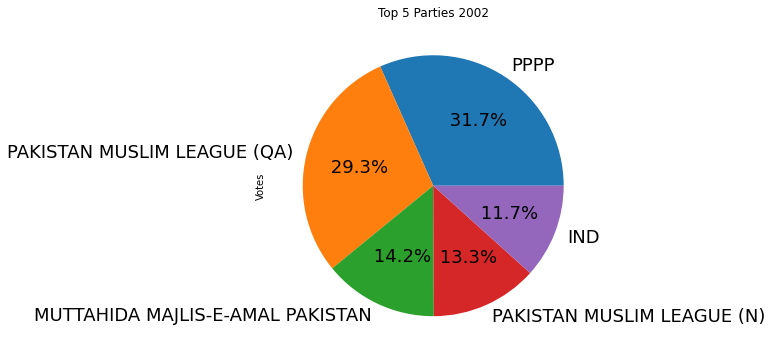

In [97]:
Parties_gain_2002.plot.pie(subplots=True, figsize=(20,6),autopct='%5.1f%%',textprops={'fontsize': 18})
plt.title('Top 5 Parties 2002')

# Q10: Number of votes per party

In [98]:

list_of_votes_per_party_2013 = df_2013.groupby(['Party'])['Votes'].sum().reset_index(name='total_votes').sort_values('total_votes', ascending=False)

fig = px.pie(list_of_votes_per_party_2013, names='Party', values='total_votes')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q11: What is the average rejected vote each year?

[1977 1988 1990 1993 1997 2002 2008 2013 2018]
Election
1977    2382.810884
1988    1474.198309
1990    1046.532308
1993    1165.218968
1997    1956.653432
2002    2524.423634
2008    2932.164940
2013    5336.826499
2018     485.691657
Name: Total_Rejected_Votes, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



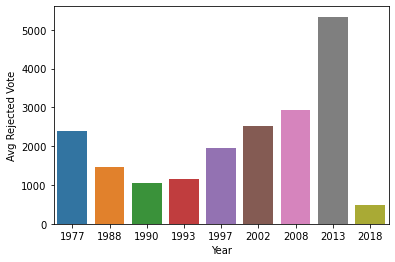

In [99]:
x=df0['Election'].unique()
y = df0.groupby('Election').Total_Rejected_Votes.mean()


print(x)
print(y)


fig = sns.barplot(x, y,data = df0)
fig.set(xlabel= 'Year', ylabel= 'Avg Rejected Vote')
plt.show()

# Q12:Total Votes by each District in Each Election

In [100]:
total_votes_df = df0.groupby('District')['Votes'].sum().reset_index().sort_values(by='Votes',ascending=False)

In [101]:
total_votes_df

,District,Votes
51,KARACHI,15758231
67,LAHORE,11437139
29,FAISALABAD,10827797
110,RAWALPINDI,7887261
88,MULTAN,7773456
...,...,...
147,ZHOB`,40515
45,JHAL,29829
124,SHIKARAPUR,26689
111,RESERVED,0


In [102]:
df = total_votes_df.sort_values(by='Votes')

fig3 = px.bar(df, x='Votes', y='District', text='Votes', orientation='h')
fig3.update_traces(texttemplate='%{text:.10s}', textposition='outside')

fig3.update_layout(template='simple_white', title='Total Votes by each District in Each Election', height=1000, xaxis=dict(title='Total Votes'), yaxis=dict(title=''))
fig3.show()

# Q13: Which Party had most votes in overall election year?

In [103]:
#total_Constituencies = df0.groupby('Party')['Votes'].sum().reset_index().sort_values(by='Votes',ascending=False)

list_of_parties_with_no_votes = df0.groupby(['Party'])['Votes'].sum().reset_index(name='total_votes').sort_values('total_votes', ascending=False)


fig = px.pie(list_of_parties_with_no_votes, values='total_votes', names='Party',
             title='Number of votes VS Party')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

 # Q14: Plot histogram of election turnout for year 2018

In [155]:
df_drop_missing = df0.copy()
df_turnout_2018 = df_drop_missing[['Election', 'Turnout']]
df_turnout_2018
turnout_2018 = df_turnout_2018.apply(lambda x: x['Election'] == 2018, axis=1)
df_turnout_2018 = df_turnout_2018[turnout_2018]
df_turnout_2018 = df_turnout_2018.dropna()
df_turnout_2018.head(1)



,Election,Turnout
15179,2018,61.0


Text(0.5, 1.0, '2018 Election Turnout')

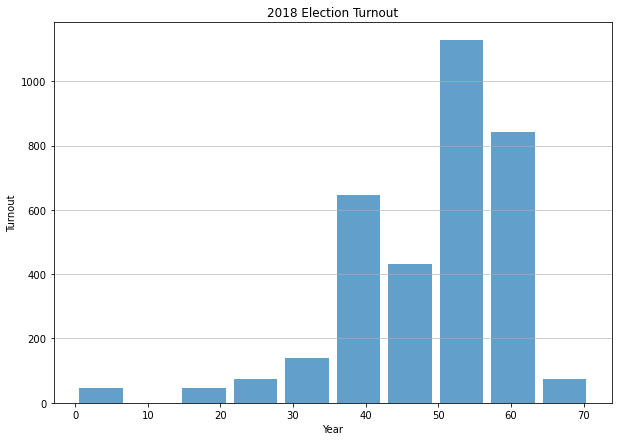

In [105]:
plt.figure(figsize=(10,7))
plt.hist(df_turnout_2018['Turnout'], alpha=0.7, rwidth=0.85 )  # `density=False` would make counts
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Turnout')
plt.title('2018 Election Turnout')
# Plot black line at mean

# Q15: Then plot mean median and mode of election turn out on the histogram of election turnout

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



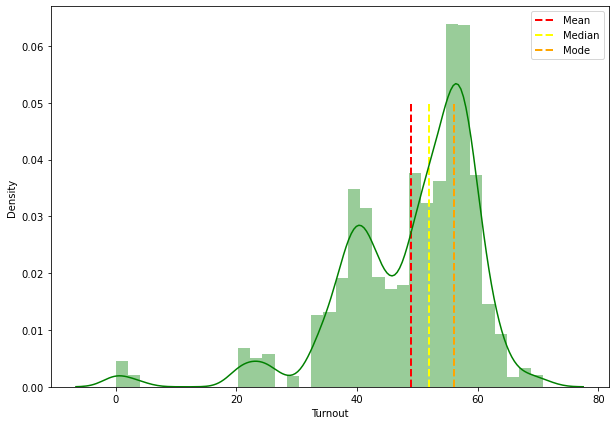

In [106]:
plt.rcParams["figure.figsize"] = [10, 7]
sns.distplot(df_turnout_2018['Turnout'], color='green')
# Plot black line at mean
plt.vlines(df_turnout_2018['Turnout'].mean(), ymin=0, ymax=0.05, linewidth=2, color='red', linestyle='--', label='Mean')
plt.vlines(df_turnout_2018['Turnout'].median(), ymin=0, ymax=0.05, linewidth=2, color='yellow', linestyle='--', label='Median')
plt.vlines(df_turnout_2018['Turnout'].astype(int) .mode(), ymin=0, ymax=0.05, linewidth=2, color='orange', linestyle='--', label='Mode')

plt.legend()

# Q16:Check the distribution of the election turn out either its positively skewed, negatively skewed, or no skewed/symmetrica

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Turnout'>

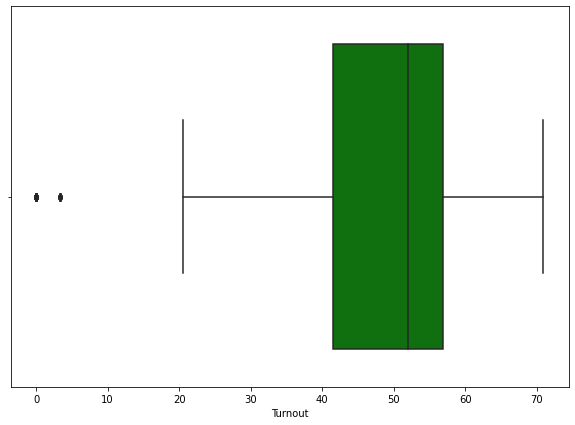

In [107]:
sns.boxplot(df_turnout_2018['Turnout'], color='green')


# Q17: Mean Median Mode of Turnout in each Years' Election

In [68]:
df0

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-I,NA-1,Muhammad Yousaf Khattak,PAKISTAN MUSLIM LEAGUE (QA),44507,79847,2688,82535,82535,55.0,1977
1,PESHAWAR,PESHAWAR-I,NA-1,Air Marshal (Retd) Asghar Khan,PNA,33964,79847,2688,82535,82535,55.0,1977
2,PESHAWAR,PESHAWAR-I,NA-1,Jan Akbar,IND,1376,79847,2688,82535,82535,55.0,1977
3,PESHAWAR,PESHAWAR-II,NA-2,Arbab Mohammad Jehandir Khan,PPPP,32247,65825,2155,67980,67980,52.4,1977
4,PESHAWAR,PESHAWAR-II,NA-2,Arbab Saif-ur-Rahman,PNA,30268,65825,2155,67980,67980,52.4,1977
...,...,...,...,...,...,...,...,...,...,...,...,...
18602,LASBELA,LASBELA-CUM-GWADAR,NA-272,Mohammad Akram,PAK SARZAMEEN PARTY,882,0,0,0,0,56.0,2018
18603,LASBELA,LASBELA-CUM-GWADAR,NA-272,Muhammad Akhtar mengal,BALOCHISTAN NATIONAL PARTY,41866,0,0,0,0,56.0,2018
18604,LASBELA,LASBELA-CUM-GWADAR,NA-272,Nawab Khan Bizenjo,AMUN TARAQQI PARTY,162,0,0,0,0,56.0,2018
18605,LASBELA,LASBELA-CUM-GWADAR,NA-272,Shakeel Ahmed,IND,338,0,0,0,0,56.0,2018


In [69]:
turnout_means = df0.groupby(['Election'])['Turnout'].agg('mean')
turnouts = pd.DataFrame(turnout_means)
turnouts.rename(columns = {'Election':'Year', 'Turnout':'TurnoutMean'}, inplace = True)
turnouts

,TurnoutMean
Election,
1977,56.323401
1988,45.119139
1990,45.916615
1993,40.906799
1997,35.726602
2002,39.082860
2008,42.450604
2013,53.895108
2018,48.916599


In [70]:
modes = df0.groupby(['Election'])['Turnout'].agg(pd.Series.mode).to_frame()
modes.rename(columns = {'Election':'Year', 'Turnout':'TurnoutMode'}, inplace = True)
modes

,TurnoutMode
Election,
1977,40.9
1988,"[42.70000000000001, 44.2]"
1990,45.6
1993,47.1
1997,40.9
2002,37
2008,40.9
2013,52
2018,56.5


In [71]:
medians = df0.groupby(['Election'])['Turnout'].agg(pd.Series.median).to_frame()
medians.rename(columns = {'Election':'Year', 'Turnout':'TurnoutMedian'}, inplace = True)
medians

,TurnoutMedian
Election,
1977,58.80
1988,44.90
1990,46.45
1993,43.10
1997,36.30
2002,38.77
2008,42.18
2013,56.11
2018,52.00


In [72]:
mmm= pd.merge(turnouts, modes, on='Election')
mmm

,TurnoutMean,TurnoutMode
Election,,
1977,56.323401,40.9
1988,45.119139,"[42.70000000000001, 44.2]"
1990,45.916615,45.6
1993,40.906799,47.1
1997,35.726602,40.9
2002,39.082860,37
2008,42.450604,40.9
2013,53.895108,52
2018,48.916599,56.5


In [73]:
mmm = pd.merge(mmm,medians,on='Election')
mmm

,TurnoutMean,TurnoutMode,TurnoutMedian
Election,,,
1977,56.323401,40.9,58.80
1988,45.119139,"[42.70000000000001, 44.2]",44.90
1990,45.916615,45.6,46.45
1993,40.906799,47.1,43.10
1997,35.726602,40.9,36.30
2002,39.082860,37,38.77
2008,42.450604,40.9,42.18
2013,53.895108,52,56.11
2018,48.916599,56.5,52.00


In [74]:
mmm['Year'] = mmm.index
mmm=mmm.reset_index()
mmm

,Election,TurnoutMean,TurnoutMode,TurnoutMedian,Year
0,1977,56.323401,40.9,58.80,1977
1,1988,45.119139,"[42.70000000000001, 44.2]",44.90,1988
2,1990,45.916615,45.6,46.45,1990
3,1993,40.906799,47.1,43.10,1993
4,1997,35.726602,40.9,36.30,1997
5,2002,39.082860,37,38.77,2002
6,2008,42.450604,40.9,42.18,2008
7,2013,53.895108,52,56.11,2013
8,2018,48.916599,56.5,52.00,2018


In [75]:
mmm.drop("Election", axis=1, inplace=True)
mmm

,TurnoutMean,TurnoutMode,TurnoutMedian,Year
0,56.323401,40.9,58.80,1977
1,45.119139,"[42.70000000000001, 44.2]",44.90,1988
2,45.916615,45.6,46.45,1990
3,40.906799,47.1,43.10,1993
4,35.726602,40.9,36.30,1997
5,39.082860,37,38.77,2002
6,42.450604,40.9,42.18,2008
7,53.895108,52,56.11,2013
8,48.916599,56.5,52.00,2018


In [76]:
import random
random.seed(104)
a = random.choice([42.7,44.2])
a

42.7

In [77]:
mmm['TurnoutMode'][1]=0
mmm

<ipython-input-77-19eaee38dff0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TurnoutMean,TurnoutMode,TurnoutMedian,Year
0,56.323401,40.9,58.80,1977
1,45.119139,0,44.90,1988
2,45.916615,45.6,46.45,1990
3,40.906799,47.1,43.10,1993
4,35.726602,40.9,36.30,1997
5,39.082860,37,38.77,2002
6,42.450604,40.9,42.18,2008
7,53.895108,52,56.11,2013
8,48.916599,56.5,52.00,2018


In [78]:
mmm = mmm.astype({"TurnoutMode": float}, errors='ignore') 
mmm

,TurnoutMean,TurnoutMode,TurnoutMedian,Year
0,56.323401,40.9,58.80,1977
1,45.119139,0.0,44.90,1988
2,45.916615,45.6,46.45,1990
3,40.906799,47.1,43.10,1993
4,35.726602,40.9,36.30,1997
5,39.082860,37.0,38.77,2002
6,42.450604,40.9,42.18,2008
7,53.895108,52.0,56.11,2013
8,48.916599,56.5,52.00,2018


In [79]:
mmm['TurnoutMode'].dtype

dtype('float64')

In [80]:
b= mmm['TurnoutMode'][1]
mmm = mmm.replace(b,a)
mmm

,TurnoutMean,TurnoutMode,TurnoutMedian,Year
0,56.323401,40.9,58.80,1977
1,45.119139,42.7,44.90,1988
2,45.916615,45.6,46.45,1990
3,40.906799,47.1,43.10,1993
4,35.726602,40.9,36.30,1997
5,39.082860,37.0,38.77,2002
6,42.450604,40.9,42.18,2008
7,53.895108,52.0,56.11,2013
8,48.916599,56.5,52.00,2018


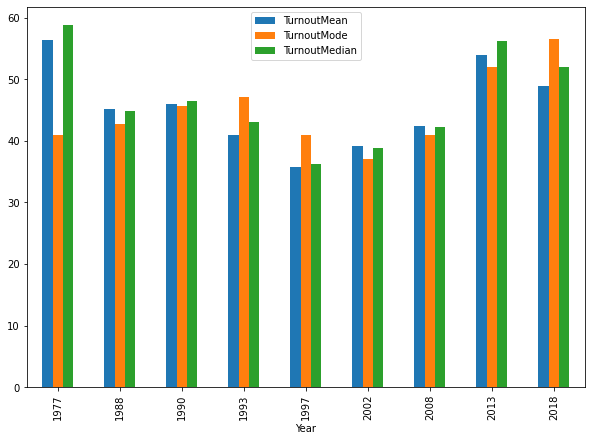

In [81]:
mmm.plot(x='Year', y=["TurnoutMean", "TurnoutMode", "TurnoutMedian"], kind="bar")
plt.show()

# Q18: Votes of parties for NA-4 in 2013 

In [82]:
#Creating a deep copy of the original dataframe
df1 = df0.copy(deep=True)
df1

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-I,NA-1,Muhammad Yousaf Khattak,PAKISTAN MUSLIM LEAGUE (QA),44507,79847,2688,82535,82535,55.0,1977
1,PESHAWAR,PESHAWAR-I,NA-1,Air Marshal (Retd) Asghar Khan,PNA,33964,79847,2688,82535,82535,55.0,1977
2,PESHAWAR,PESHAWAR-I,NA-1,Jan Akbar,IND,1376,79847,2688,82535,82535,55.0,1977
3,PESHAWAR,PESHAWAR-II,NA-2,Arbab Mohammad Jehandir Khan,PPPP,32247,65825,2155,67980,67980,52.4,1977
4,PESHAWAR,PESHAWAR-II,NA-2,Arbab Saif-ur-Rahman,PNA,30268,65825,2155,67980,67980,52.4,1977
...,...,...,...,...,...,...,...,...,...,...,...,...
18602,LASBELA,LASBELA-CUM-GWADAR,NA-272,Mohammad Akram,PAK SARZAMEEN PARTY,882,0,0,0,0,56.0,2018
18603,LASBELA,LASBELA-CUM-GWADAR,NA-272,Muhammad Akhtar mengal,BALOCHISTAN NATIONAL PARTY,41866,0,0,0,0,56.0,2018
18604,LASBELA,LASBELA-CUM-GWADAR,NA-272,Nawab Khan Bizenjo,AMUN TARAQQI PARTY,162,0,0,0,0,56.0,2018
18605,LASBELA,LASBELA-CUM-GWADAR,NA-272,Shakeel Ahmed,IND,338,0,0,0,0,56.0,2018


In [83]:
df1 = df1.loc[df1['Election'] == 2013]

In [84]:
df1 =df1.reset_index()
df1

,index,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,10643,PESHAWAR,PESHAWAR-I,NA-1,Aamir Shehzad Hashmi,MUSTAQBIL PAKISTAN,77,145924,2103,146044,146044,46.18,2013
1,10644,PESHAWAR,PESHAWAR-I,NA-1,Akram Khan,IND,182,145924,2103,146044,146044,46.18,2013
2,10645,PESHAWAR,PESHAWAR-I,NA-1,Alhaaj Ghulam Ahmad Bilour,AWAMI NATIONAL PARTY,24468,145924,2103,146044,146044,46.18,2013
3,10646,PESHAWAR,PESHAWAR-I,NA-1,Amir Syed,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),454,145924,2103,146044,146044,46.18,2013
4,10647,PESHAWAR,PESHAWAR-I,NA-1,Bashir Ahmad Afridi,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,117,145924,2103,146044,146044,46.18,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,15174,KARACHI,KARACHI-XVI,NA-254,Muhammad Hussain Khan,IND,76,0,0,63383,63383,40.90,2013
4532,15175,KARACHI,KARACHI-XVI,NA-254,Muhammad Rustam Qadri,IND,66,0,0,63383,63383,40.90,2013
4533,15176,KARACHI,KARACHI-XVI,NA-254,Shabbir Ahmad Qaim Khani,IND,34,0,0,63383,63383,40.90,2013
4534,15177,KARACHI,KARACHI-XVI,NA-254,Muhammad Arif Khan,IND,29,0,0,63383,63383,40.90,2013


In [85]:
parties = df1.Party.unique()
parties

array(['MUSTAQBIL PAKISTAN', 'IND', 'AWAMI NATIONAL PARTY',
       'PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)',
       'MUTTAHIDA QAUMI MOVEMENT PAKISTAN', 'JAMIAT ULAMA-E-ISLAM (F)',
       'MUTAHIDA DEENI MAHAZ', 'PTI', 'QAUMI WATAN PARTY (SHERPAO)',
       'PAKISTAN MUSLIM LEAGUE (J)', 'JUMIAT ULMA-E-ISLAM(NAZRYATI)',
       'PAKISTAN MUSLIM LEAGUE (N)', 'PPPP', 'JAMAAT-E-ISLAMI PAKISTAN',
       'JAMIAT ULAMA-E-PAKISTAN  (NOORANI)',
       'PAKISTAN INSANI HAQOOK PARTY (PAKISTAN HUMAN RIGHTS PARTY)',
       'PAKISTAN MUSLIM LEAGUE', 'PAKISTAN PATRIOTIC MOVEMENT',
       'ALL PAKISTAN MUSLIM LEAGUE', 'PASHTOONKHWA MILLI AWAMI PARTY',
       'TEHREEK-E-PASMANADA AWAM PAKISTAN', 'JANNAT PAKISTAN PARTY',
       'TEHREEK-E-ITTEHAD UMMAT PAKISTAN',
       'AWAMI JAMHURI ITTEHAD PAKISTAN', 'AWAMI WORKERS PARTY',
       'PAK JUSTIC PARTY (HAQIQI)', 'TEHRIK-E-MASAWAAT', 'MILLAT PARTY',
       'TEHREEK-E-SUBA HAZARA', 'PAKISTAN MUSLIM LEAGUE (SAFDAR)',
       'HAZARA AWAMI ITTEHAD PAKISTAN', '

In [86]:
df2=pd.DataFrame(parties,columns=['Party2013'])
df2

,Party2013
0,MUSTAQBIL PAKISTAN
1,IND
2,AWAMI NATIONAL PARTY
3,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN
...,...
112,MWM
113,JUP-N
114,MQMP
115,PMA


In [87]:
seats = df1.Constituency_title.unique()
seats

array(['NA-1', 'NA-2', 'NA-3', 'NA-4', 'NA-5', 'NA-6', 'NA-7', 'NA-8',
       'NA-9', 'NA-10', 'NA-11', 'NA-12', 'NA-13', 'NA-14', 'NA-15',
       'NA-16', 'NA-17', 'NA-18', 'NA-19', 'NA-20', 'NA-21', 'NA-22',
       'NA-23', 'NA-24', 'NA-25', 'NA-26', 'NA-27', 'NA-28', 'NA-29',
       'NA-30', 'NA-31', 'NA-32', 'NA-33', 'NA-34', 'NA-35', 'NA-36',
       'NA-37', 'NA-38', 'NA-39', 'NA-40', 'NA-41', 'NA-42', 'NA-43',
       'NA-44', 'NA-45', 'NA-46', 'NA-47', 'NA-48', 'NA-49', 'NA-50',
       'NA-51', 'NA-52', 'NA-53', 'NA-54', 'NA-55', 'NA-56', 'NA-57',
       'NA-58', 'NA-59', 'NA-60', 'NA-61', 'NA-62', 'NA-63', 'NA-64',
       'NA-65', 'NA-66', 'NA-67', 'NA-68', 'NA-69', 'NA-70', 'NA-71',
       'NA-72', 'NA-73', 'NA-74', 'NA-75', 'NA-76', 'NA-77', 'NA-78',
       'NA-79', 'NA-80', 'NA-81', 'NA-82', 'NA-84', 'NA-85', 'NA-86',
       'NA-87', 'NA-88', 'NA-89', 'NA-90', 'NA-91', 'NA-92', 'NA-93',
       'NA-94', 'NA-95', 'NA-96', 'NA-97', 'NA-98', 'NA-99', 'NA-100',
       'NA-101', 'N

In [88]:
df1 = df1.loc[df1['Constituency_title'] == 'NA-4']
df1=df1.reset_index()
df1

,level_0,index,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,51,10694,PESHAWAR,PESHAWAR-IV,NA-4,ANEELA SHAHEEN,IND,1852,138555,3707,142160,142160,40.34,2013
1,52,10695,PESHAWAR,PESHAWAR-IV,NA-4,ARBAB KAMAL AHMAD,JAMIAT ULAMA-E-ISLAM (F),12519,138555,3707,142160,142160,40.34,2013
2,53,10696,PESHAWAR,PESHAWAR-IV,NA-4,ARBAB MOHAMMAD AYUB JAN,AWAMI NATIONAL PARTY,15795,138555,3707,142160,142160,40.34,2013
3,54,10697,PESHAWAR,PESHAWAR-IV,NA-4,FAIZ MUHAMMAD,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,261,138555,3707,142160,142160,40.34,2013
4,55,10698,PESHAWAR,PESHAWAR-IV,NA-4,GUL WAZIR SHAHEEN,MUTAHIDA DEENI MAHAZ,1519,138555,3707,142160,142160,40.34,2013
5,56,10699,PESHAWAR,PESHAWAR-IV,NA-4,GULZAR KHAN,PTI,55134,138555,3707,142160,142160,40.34,2013
6,57,10700,PESHAWAR,PESHAWAR-IV,NA-4,MIAN ABDUL LATIF,QAUMI WATAN PARTY (SHERPAO),759,138555,3707,142160,142160,40.34,2013
7,58,10701,PESHAWAR,PESHAWAR-IV,NA-4,MISBAH UD DIN,PPPP,12031,138555,3707,142160,142160,40.34,2013
8,59,10702,PESHAWAR,PESHAWAR-IV,NA-4,MOLANA MIRAJ UD DIN SIRKANI,JAMIAT ULAMA-E-PAKISTAN (NOORANI),1166,138555,3707,142160,142160,40.34,2013
9,60,10703,PESHAWAR,PESHAWAR-IV,NA-4,NASIR KHAN MOSAZAI,PAKISTAN MUSLIM LEAGUE (N),20412,138555,3707,142160,142160,40.34,2013


In [89]:
df1= df1.drop(['level_0', 'index'], axis=1)
df1

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-IV,NA-4,ANEELA SHAHEEN,IND,1852,138555,3707,142160,142160,40.34,2013
1,PESHAWAR,PESHAWAR-IV,NA-4,ARBAB KAMAL AHMAD,JAMIAT ULAMA-E-ISLAM (F),12519,138555,3707,142160,142160,40.34,2013
2,PESHAWAR,PESHAWAR-IV,NA-4,ARBAB MOHAMMAD AYUB JAN,AWAMI NATIONAL PARTY,15795,138555,3707,142160,142160,40.34,2013
3,PESHAWAR,PESHAWAR-IV,NA-4,FAIZ MUHAMMAD,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,261,138555,3707,142160,142160,40.34,2013
4,PESHAWAR,PESHAWAR-IV,NA-4,GUL WAZIR SHAHEEN,MUTAHIDA DEENI MAHAZ,1519,138555,3707,142160,142160,40.34,2013
5,PESHAWAR,PESHAWAR-IV,NA-4,GULZAR KHAN,PTI,55134,138555,3707,142160,142160,40.34,2013
6,PESHAWAR,PESHAWAR-IV,NA-4,MIAN ABDUL LATIF,QAUMI WATAN PARTY (SHERPAO),759,138555,3707,142160,142160,40.34,2013
7,PESHAWAR,PESHAWAR-IV,NA-4,MISBAH UD DIN,PPPP,12031,138555,3707,142160,142160,40.34,2013
8,PESHAWAR,PESHAWAR-IV,NA-4,MOLANA MIRAJ UD DIN SIRKANI,JAMIAT ULAMA-E-PAKISTAN (NOORANI),1166,138555,3707,142160,142160,40.34,2013
9,PESHAWAR,PESHAWAR-IV,NA-4,NASIR KHAN MOSAZAI,PAKISTAN MUSLIM LEAGUE (N),20412,138555,3707,142160,142160,40.34,2013


In [90]:
df2

,Party2013
0,MUSTAQBIL PAKISTAN
1,IND
2,AWAMI NATIONAL PARTY
3,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN
...,...
112,MWM
113,JUP-N
114,MQMP
115,PMA


In [91]:
mapping = dict(df1[['Party', 'Votes']].values)
mapping

{'IND': 392,
 'JAMIAT ULAMA-E-ISLAM (F)': 12519,
 'AWAMI NATIONAL PARTY': 15795,
 'MUTTAHIDA QAUMI MOVEMENT PAKISTAN': 261,
 'MUTAHIDA DEENI MAHAZ': 1519,
 'PTI': 55134,
 'QAUMI WATAN PARTY (SHERPAO)': 759,
 'PPPP': 12031,
 'JAMIAT ULAMA-E-PAKISTAN  (NOORANI)': 1166,
 'PAKISTAN MUSLIM LEAGUE (N)': 20412,
 'JAMAAT-E-ISLAMI PAKISTAN': 16493}

In [92]:
df2['Votes'] = df2.Party2013.map(mapping)
print(df2)

                                   Party2013    Votes
0                         MUSTAQBIL PAKISTAN      NaN
1                                        IND    392.0
2                       AWAMI NATIONAL PARTY  15795.0
3    PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)      NaN
4          MUTTAHIDA QAUMI MOVEMENT PAKISTAN    261.0
..                                       ...      ...
112                                      MWM      NaN
113                                    JUP-N      NaN
114                                     MQMP      NaN
115                                      PMA      NaN
116                                    PKMAP      NaN

[117 rows x 2 columns]


In [93]:
df2=df2.fillna(0)
df2

,Party2013,Votes
0,MUSTAQBIL PAKISTAN,0.0
1,IND,392.0
2,AWAMI NATIONAL PARTY,15795.0
3,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),0.0
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,261.0
...,...,...
112,MWM,0.0
113,JUP-N,0.0
114,MQMP,0.0
115,PMA,0.0


In [94]:
df2 = df2.nlargest(10,'Votes')
df2

,Party2013,Votes
7,PTI,55134.0
11,PAKISTAN MUSLIM LEAGUE (N),20412.0
13,JAMAAT-E-ISLAMI PAKISTAN,16493.0
2,AWAMI NATIONAL PARTY,15795.0
5,JAMIAT ULAMA-E-ISLAM (F),12519.0
12,PPPP,12031.0
6,MUTAHIDA DEENI MAHAZ,1519.0
14,JAMIAT ULAMA-E-PAKISTAN (NOORANI),1166.0
8,QAUMI WATAN PARTY (SHERPAO),759.0
1,IND,392.0


<AxesSubplot:title={'center':'Representation of Parties for NA-4 in 2013'}, xlabel='Party2013'>

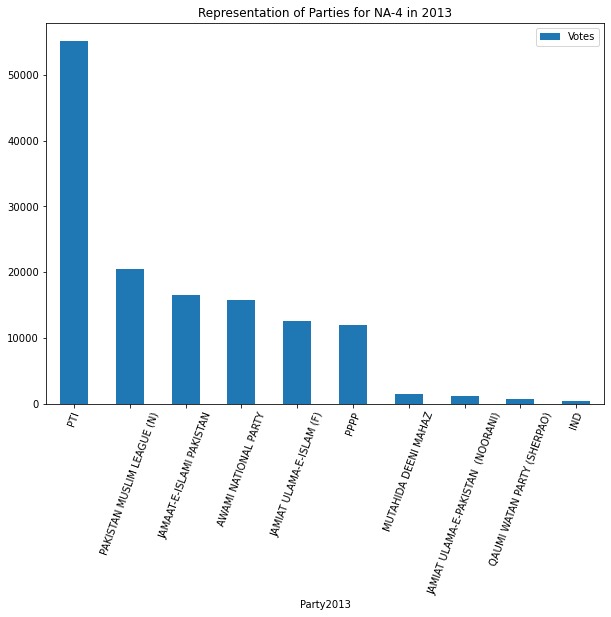

In [95]:
df2.plot.bar(x="Party2013", y="Votes", rot=70, title="Representation of Parties for NA-4 in 2013")

In [96]:
df3 = df0.copy(deep=True)
df3

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-I,NA-1,Muhammad Yousaf Khattak,PAKISTAN MUSLIM LEAGUE (QA),44507,79847,2688,82535,82535,55.0,1977
1,PESHAWAR,PESHAWAR-I,NA-1,Air Marshal (Retd) Asghar Khan,PNA,33964,79847,2688,82535,82535,55.0,1977
2,PESHAWAR,PESHAWAR-I,NA-1,Jan Akbar,IND,1376,79847,2688,82535,82535,55.0,1977
3,PESHAWAR,PESHAWAR-II,NA-2,Arbab Mohammad Jehandir Khan,PPPP,32247,65825,2155,67980,67980,52.4,1977
4,PESHAWAR,PESHAWAR-II,NA-2,Arbab Saif-ur-Rahman,PNA,30268,65825,2155,67980,67980,52.4,1977
...,...,...,...,...,...,...,...,...,...,...,...,...
18602,LASBELA,LASBELA-CUM-GWADAR,NA-272,Mohammad Akram,PAK SARZAMEEN PARTY,882,0,0,0,0,56.0,2018
18603,LASBELA,LASBELA-CUM-GWADAR,NA-272,Muhammad Akhtar mengal,BALOCHISTAN NATIONAL PARTY,41866,0,0,0,0,56.0,2018
18604,LASBELA,LASBELA-CUM-GWADAR,NA-272,Nawab Khan Bizenjo,AMUN TARAQQI PARTY,162,0,0,0,0,56.0,2018
18605,LASBELA,LASBELA-CUM-GWADAR,NA-272,Shakeel Ahmed,IND,338,0,0,0,0,56.0,2018


In [97]:
df3 = df3.loc[df3['Election'] == 2008]

In [98]:
df3=df3.reset_index()
df3

,index,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,8327,PESHAWAR,PESHAWAR-1,NA-1,Abdullah Jan,IND,313,88325,629,88913,88913,22.97,2008
1,8328,PESHAWAR,PESHAWAR-1,NA-1,Ashoni Kumar,IND,156,88325,629,88913,88913,22.97,2008
2,8329,PESHAWAR,PESHAWAR-1,NA-1,Aurangzeb,IND,261,88325,629,88913,88913,22.97,2008
3,8330,PESHAWAR,PESHAWAR-1,NA-1,Ayub Shah,PPPP,37682,88325,629,88913,88913,22.97,2008
4,8331,PESHAWAR,PESHAWAR-1,NA-1,Fakhri Alam Khan Paracha,IND,184,88325,629,88913,88913,22.97,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,10638,KECH,KECH-CUM-GWADAR,NA-272,Dr. Muhammad Haider Baloch,PPPP,3514,107930,3992,106936,106936,33.75,2008
2312,10639,KECH,KECH-CUM-GWADAR,NA-272,Mufti Ahtisham-ul-Haq Asia Abadi,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,1237,107930,3992,106936,106936,33.75,2008
2313,10640,KECH,KECH-CUM-GWADAR,NA-272,Syed Sher Jan. (R),IND,1520,107930,3992,106936,106936,33.75,2008
2314,10641,KECH,KECH-CUM-GWADAR,NA-272,Yaqoob Bizenjo.,BALOCHISTAN NATIONAL PARTY (AWAMI),61655,107930,3992,106936,106936,33.75,2008


In [99]:
df3= df3.drop(['index'], axis=1)
df3

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-1,NA-1,Abdullah Jan,IND,313,88325,629,88913,88913,22.97,2008
1,PESHAWAR,PESHAWAR-1,NA-1,Ashoni Kumar,IND,156,88325,629,88913,88913,22.97,2008
2,PESHAWAR,PESHAWAR-1,NA-1,Aurangzeb,IND,261,88325,629,88913,88913,22.97,2008
3,PESHAWAR,PESHAWAR-1,NA-1,Ayub Shah,PPPP,37682,88325,629,88913,88913,22.97,2008
4,PESHAWAR,PESHAWAR-1,NA-1,Fakhri Alam Khan Paracha,IND,184,88325,629,88913,88913,22.97,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
2311,KECH,KECH-CUM-GWADAR,NA-272,Dr. Muhammad Haider Baloch,PPPP,3514,107930,3992,106936,106936,33.75,2008
2312,KECH,KECH-CUM-GWADAR,NA-272,Mufti Ahtisham-ul-Haq Asia Abadi,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,1237,107930,3992,106936,106936,33.75,2008
2313,KECH,KECH-CUM-GWADAR,NA-272,Syed Sher Jan. (R),IND,1520,107930,3992,106936,106936,33.75,2008
2314,KECH,KECH-CUM-GWADAR,NA-272,Yaqoob Bizenjo.,BALOCHISTAN NATIONAL PARTY (AWAMI),61655,107930,3992,106936,106936,33.75,2008


In [100]:
x = df3.groupby('Party').count()
x.Candidate_Name.sum()

2316

In [101]:
df3.Candidate_Name.count()

2316

In [102]:
x=x.nlargest(10,'Candidate_Name')
x

,District,Seat,Constituency_title,Candidate_Name,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
Party,,,,,,,,,,,
IND,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
PPPP,235,235,235,235,235,235,235,235,235,235,235
PAKISTAN MUSLIM LEAGUE (N),200,200,200,200,200,200,200,200,200,200,200
PAKISTAN MUSLIM LEAGUE,188,188,188,188,188,188,188,188,188,188,188
MUTTAHIDA QAUMI MOVEMENT PAKISTAN,106,106,106,106,106,106,106,106,106,106,106
MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,102,102,102,102,102,102,102,102,102,102,102
AWAMI NATIONAL PARTY,41,41,41,41,41,41,41,41,41,41,41
PAKISTAN MUSLIM LEAGUE (F),14,14,14,14,14,14,14,14,14,14,14
PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),8,8,8,8,8,8,8,8,8,8,8


In [103]:
x.drop(x.columns.difference(['Candidate_Name']), 1, inplace=True)
x

,Candidate_Name
Party,
IND,1346
PPPP,235
PAKISTAN MUSLIM LEAGUE (N),200
PAKISTAN MUSLIM LEAGUE,188
MUTTAHIDA QAUMI MOVEMENT PAKISTAN,106
MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,102
AWAMI NATIONAL PARTY,41
PAKISTAN MUSLIM LEAGUE (F),14
PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),8


In [104]:
x['PartyName'] = x.index
x

,Candidate_Name,PartyName
Party,,
IND,1346,IND
PPPP,235,PPPP
PAKISTAN MUSLIM LEAGUE (N),200,PAKISTAN MUSLIM LEAGUE (N)
PAKISTAN MUSLIM LEAGUE,188,PAKISTAN MUSLIM LEAGUE
MUTTAHIDA QAUMI MOVEMENT PAKISTAN,106,MUTTAHIDA QAUMI MOVEMENT PAKISTAN
MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,102,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN
AWAMI NATIONAL PARTY,41,AWAMI NATIONAL PARTY
PAKISTAN MUSLIM LEAGUE (F),14,PAKISTAN MUSLIM LEAGUE (F)
PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),8,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)


In [105]:
x = x.reset_index()
x

,Party,Candidate_Name,PartyName
0,IND,1346,IND
1,PPPP,235,PPPP
2,PAKISTAN MUSLIM LEAGUE (N),200,PAKISTAN MUSLIM LEAGUE (N)
3,PAKISTAN MUSLIM LEAGUE,188,PAKISTAN MUSLIM LEAGUE
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,106,MUTTAHIDA QAUMI MOVEMENT PAKISTAN
5,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,102,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN
6,AWAMI NATIONAL PARTY,41,AWAMI NATIONAL PARTY
7,PAKISTAN MUSLIM LEAGUE (F),14,PAKISTAN MUSLIM LEAGUE (F)
8,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),8,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO)
9,JAMIAT ULAMA-E-ISLAM PAKISTAN (S),6,JAMIAT ULAMA-E-ISLAM PAKISTAN (S)


In [106]:
x= x.drop(['PartyName'], axis=1)
x

,Party,Candidate_Name
0,IND,1346
1,PPPP,235
2,PAKISTAN MUSLIM LEAGUE (N),200
3,PAKISTAN MUSLIM LEAGUE,188
4,MUTTAHIDA QAUMI MOVEMENT PAKISTAN,106
5,MUTTAHIDA MAJLIS-E-AMAL PAKISTAN,102
6,AWAMI NATIONAL PARTY,41
7,PAKISTAN MUSLIM LEAGUE (F),14
8,PAKISTAN PEOPLES PARTY (SHAHEED BHUTTO),8
9,JAMIAT ULAMA-E-ISLAM PAKISTAN (S),6


In [107]:
x.rename(columns = {'Candidate_Name':'Candidates'}, inplace = True)

<AxesSubplot:title={'center':'Representation of Candidates/Party in 2008'}, xlabel='Party'>

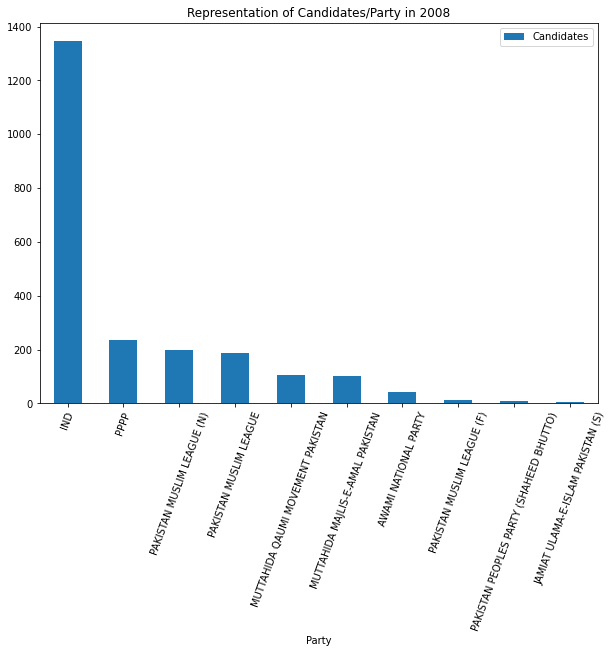

In [108]:
x.plot.bar(x="Party", y="Candidates", rot=70, title="Representation of Candidates/Party in 2008")

# Q20: Total Candidates present in each seat ID in 1993

In [109]:
df4= df0.copy(deep=True)
df4

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,PESHAWAR,PESHAWAR-I,NA-1,Muhammad Yousaf Khattak,PAKISTAN MUSLIM LEAGUE (QA),44507,79847,2688,82535,82535,55.0,1977
1,PESHAWAR,PESHAWAR-I,NA-1,Air Marshal (Retd) Asghar Khan,PNA,33964,79847,2688,82535,82535,55.0,1977
2,PESHAWAR,PESHAWAR-I,NA-1,Jan Akbar,IND,1376,79847,2688,82535,82535,55.0,1977
3,PESHAWAR,PESHAWAR-II,NA-2,Arbab Mohammad Jehandir Khan,PPPP,32247,65825,2155,67980,67980,52.4,1977
4,PESHAWAR,PESHAWAR-II,NA-2,Arbab Saif-ur-Rahman,PNA,30268,65825,2155,67980,67980,52.4,1977
...,...,...,...,...,...,...,...,...,...,...,...,...
18602,LASBELA,LASBELA-CUM-GWADAR,NA-272,Mohammad Akram,PAK SARZAMEEN PARTY,882,0,0,0,0,56.0,2018
18603,LASBELA,LASBELA-CUM-GWADAR,NA-272,Muhammad Akhtar mengal,BALOCHISTAN NATIONAL PARTY,41866,0,0,0,0,56.0,2018
18604,LASBELA,LASBELA-CUM-GWADAR,NA-272,Nawab Khan Bizenjo,AMUN TARAQQI PARTY,162,0,0,0,0,56.0,2018
18605,LASBELA,LASBELA-CUM-GWADAR,NA-272,Shakeel Ahmed,IND,338,0,0,0,0,56.0,2018


In [110]:
df4 = df4.loc[df4['Election'] == 1993]
df4

,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
3336,PESHAWAR,PESHAWAR-1,NA1,Syed Zafar Ali Shah,PPPP,40343,89906,1925,91831,91831,36.9,1993
3337,PESHAWAR,PESHAWAR-1,NA1,Haji Ghulam Ahmad Bilour,ANP,35755,89906,1925,91831,91831,36.9,1993
3338,PESHAWAR,PESHAWAR-1,NA1,Haji Dost Muhammad,PIF,9725,89906,1925,91831,91831,36.9,1993
3339,PESHAWAR,PESHAWAR-1,NA1,Ghulam Jafar,IND,1943,89906,1925,91831,91831,36.9,1993
3340,PESHAWAR,PESHAWAR-1,NA1,Zaboor Khan,IND,834,89906,1925,91831,91831,36.9,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,TURBAT,TURBAT-CUM-PANJGUR,NA207,Molana Abdul Haq,PIF,1700,58995,2090,61085,61085,27.1,1993
4766,TURBAT,TURBAT-CUM-PANJGUR,NA207,Qazi Ghulam Rasool,BNM (M),1598,58995,2090,61085,61085,27.1,1993
4767,TURBAT,TURBAT-CUM-PANJGUR,NA207,Amanullah Gichki,IND,805,58995,2090,61085,61085,27.1,1993
4768,TURBAT,TURBAT-CUM-PANJGUR,NA207,Sardar Ahmad Jan,IND,440,58995,2090,61085,61085,27.1,1993


In [111]:
df4=df4.reset_index()

In [112]:
df4.head()

,index,District,Seat,Constituency_title,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
0,3336,PESHAWAR,PESHAWAR-1,NA1,Syed Zafar Ali Shah,PPPP,40343,89906,1925,91831,91831,36.9,1993
1,3337,PESHAWAR,PESHAWAR-1,NA1,Haji Ghulam Ahmad Bilour,ANP,35755,89906,1925,91831,91831,36.9,1993
2,3338,PESHAWAR,PESHAWAR-1,NA1,Haji Dost Muhammad,PIF,9725,89906,1925,91831,91831,36.9,1993
3,3339,PESHAWAR,PESHAWAR-1,NA1,Ghulam Jafar,IND,1943,89906,1925,91831,91831,36.9,1993
4,3340,PESHAWAR,PESHAWAR-1,NA1,Zaboor Khan,IND,834,89906,1925,91831,91831,36.9,1993


In [113]:
seats = df4.Constituency_title.unique()
seats

array(['NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6', 'NA7', 'NA8', 'NA9',
       'NA10', 'NA11', 'NA12', 'NA13', 'NA14', 'NA15', 'NA16', 'NA17',
       'NA18', 'NA19', 'NA20', 'NA21', 'NA22', 'NA23', 'NA24', 'NA25',
       'NA26', 'NA27', 'NA28', 'NA29', 'NA30', 'NA31', 'NA32', 'NA33',
       'NA34', 'NA35', 'NA36', 'NA37', 'NA38', 'NA39', 'NA40', 'NA41',
       'NA42', 'NA43', 'NA44', 'NA45', 'NA46', 'NA47', 'NA48', 'NA49',
       'NA50', 'NA51', 'NA52', 'NA53', 'NA54', 'NA55', 'NA56', 'NA57',
       'NA58', 'NA59', 'NA60', 'NA61', 'NA62', 'NA63', 'NA64', 'NA65',
       'NA66', 'NA67', 'NA68', 'NA69', 'NA70', 'NA71', 'NA72', 'NA73',
       'NA74', 'NA75', 'NA76', 'NA77', 'NA78', 'NA79', 'NA80', 'NA81',
       'NA82', 'NA83', 'NA84', 'NA85', 'NA86', 'NA87', 'NA88', 'NA89',
       'NA90', 'NA91', 'NA92', 'NA93', 'NA94', 'NA95', 'NA96', 'NA97',
       'NA98', 'NA99', 'NA100', 'NA101', 'NA102', 'NA103', 'NA104',
       'NA105', 'NA106', 'NA107', 'NA108', 'NA109', 'NA110', 'NA111',
       'NA1

In [114]:
df5=pd.DataFrame(seats,columns=['Seats'])
df5

,Seats
0,NA1
1,NA2
2,NA3
3,NA4
4,NA5
...,...
202,NA203
203,NA204
204,NA205
205,NA206


In [115]:
y = df4.groupby('Constituency_title').count()
y.Candidate_Name.sum()

1434

In [116]:
df4.Candidate_Name.count()

1434

In [117]:
y.head()

,index,District,Seat,Candidate_Name,Party,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
Constituency_title,,,,,,,,,,,,
NA1,9,9,9,9,9,9,9,9,9,9,9,9
NA10,7,7,7,7,7,7,7,7,7,7,7,7
NA100,7,7,7,7,7,7,7,7,7,7,7,7
NA101,6,6,6,6,6,6,6,6,6,6,6,6
NA102,7,7,7,7,7,7,7,7,7,7,7,7


In [118]:
y.drop(y.columns.difference(['Seat']), 1, inplace=True)
y

,Seat
Constituency_title,
NA1,9
NA10,7
NA100,7
NA101,6
NA102,7
...,...
NA95,11
NA96,6
NA97,7


In [119]:
y['SeatID']=y.index
y

,Seat,SeatID
Constituency_title,,
NA1,9,NA1
NA10,7,NA10
NA100,7,NA100
NA101,6,NA101
NA102,7,NA102
...,...,...
NA95,11,NA95
NA96,6,NA96
NA97,7,NA97


In [120]:
y=y.reset_index()

In [121]:
y= y.drop(['SeatID'], axis=1)
y.head()

,Constituency_title,Seat
0,NA1,9
1,NA10,7
2,NA100,7
3,NA101,6
4,NA102,7


In [122]:
y.nlargest(20,'Seat')

,Constituency_title,Seat
128,NA28,29
127,NA27,28
134,NA33,27
104,NA193,22
91,NA181,19
101,NA190,17
102,NA191,17
58,NA151,16
66,NA159,16
107,NA196,16


In [123]:
y=y.reset_index()
y= y.drop(['index'], axis=1)

In [124]:
y=y.nlargest(20,'Seat')

<AxesSubplot:title={'center':'Representation of Candidates/Seat in 1993'}, xlabel='Constituency_title'>

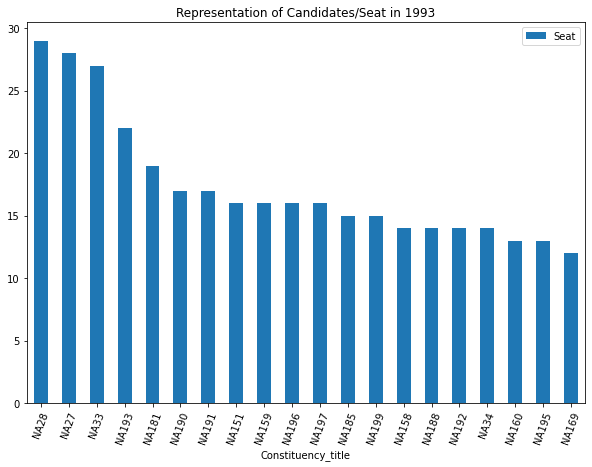

In [125]:
y.plot.bar(x="Constituency_title", y="Seat", rot=70, title="Representation of Candidates/Seat in 1993")

# Q21: Correlation

In [126]:
df0.corr()

,Votes,Total_Valid_Votes,Total_Rejected_Votes,Total_Votes,Total_Registered_Voters,Turnout,Election
Votes,1.000000,0.205672,0.120932,0.200424,0.200424,0.134580,-0.054112
Total_Valid_Votes,0.205672,1.000000,0.688302,0.973792,0.973792,0.318691,-0.007425
Total_Rejected_Votes,0.120932,0.688302,1.000000,0.686007,0.686007,0.291737,0.165316
Total_Votes,0.200424,0.973792,0.686007,1.000000,1.000000,0.305620,-0.007928
Total_Registered_Voters,0.200424,0.973792,0.686007,1.000000,1.000000,0.305620,-0.007928
Turnout,0.134580,0.318691,0.291737,0.305620,0.305620,1.000000,0.173513
Election,-0.054112,-0.007425,0.165316,-0.007928,-0.007928,0.173513,1.000000


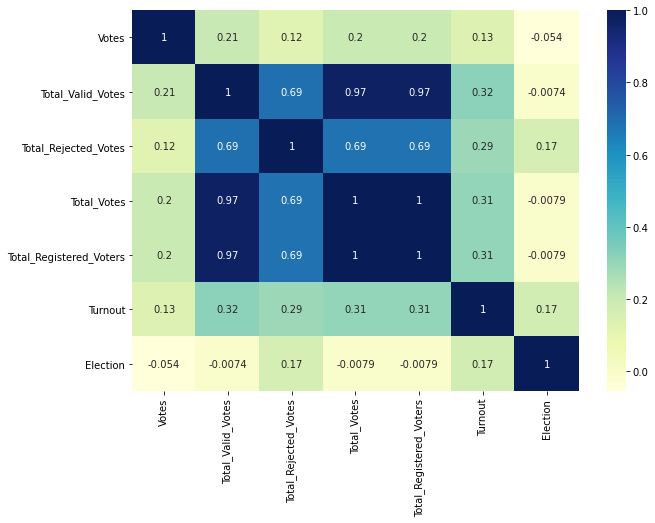

In [127]:
dataplot = sns.heatmap(df0.corr(), cmap="YlGnBu", annot=True)